<a href="https://colab.research.google.com/github/VitalyGladyshev/Medicine-HG-COPD/blob/main/Med_Models_PhAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модели - Стадия АГ

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def classification_metrics(y, pred):
    pre = accuracy_score(y, pred)
    print(f"accuracy score:\t\t{pre:.5f}\n")

    pre = f1_score(y, pred, average="macro")
    print(f"f1 score:\t\t{pre:.5f}")

    pre = precision_score(y, pred, average="macro")
    print(f"precision score:\t{pre:.5f}")

    pre = recall_score(y, pred, average="macro")
    print(f"recall score:\t\t{pre:.5f}")

## Группа 1

In [ ]:
data_1 = pd.read_csv("ikm_start_1.csv")
data_1.head()

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,S,Imax,Imax_S,эндотелин,хс,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,2.207,71,5,9,34.0,49.0,68,112,11.5,13.0,...,657,122,0.185693,2.207,4.0,0,55,2,2,3
1,0.600,72,6,10,34.1,49.2,69,114,11.5,13.4,...,2524,851,0.337163,0.600,4.1,0,46,2,2,2
2,14.775,73,7,11,35.6,49.4,70,115,11.5,13.1,...,657,122,0.185693,14.775,4.2,0,45,2,2,2
3,1.647,74,8,12,37.9,49.0,71,118,11.5,13.7,...,702,130,0.185185,1.647,4.3,0,61,3,2,3
4,12.706,75,5,13,38.5,50.0,72,120,11.5,13.8,...,624,115,0.184295,12.706,4.4,0,78,3,2,3


In [ ]:
data_1.describe()

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,S,Imax,Imax_S,эндотелин,хс,пол1,возраст,стадия_АГ,степень_АГ,ССР
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.983538,70.961538,6.250000,10.846154,36.426923,52.163462,72.865385,124.461538,12.342308,13.601923,...,1728.134615,431.076923,0.224490,4.772000,6.030769,0.365385,58.365385,2.442308,1.730769,2.634615
std,4.235909,8.207986,1.135436,1.588989,2.017484,3.456510,3.503661,11.090469,0.680930,0.596884,...,966.259861,402.954765,0.094786,3.676891,1.413456,0.486236,10.109264,0.725271,0.597885,0.561121
min,-1.000000,58.000000,5.000000,9.000000,34.000000,49.000000,68.000000,112.000000,11.500000,13.000000,...,624.000000,101.000000,0.116349,0.600000,3.600000,0.000000,35.000000,1.000000,1.000000,1.000000
25%,-1.000000,65.000000,5.000000,9.000000,34.200000,49.200000,70.000000,115.000000,11.500000,13.100000,...,691.000000,130.000000,0.180562,1.539750,4.875000,0.000000,51.750000,2.000000,1.000000,2.000000
50%,0.947500,68.500000,6.000000,11.000000,37.000000,50.050000,72.500000,121.500000,12.450000,13.400000,...,1882.500000,345.500000,0.185693,4.000000,6.050000,0.000000,57.000000,3.000000,2.000000,3.000000
75%,2.389250,76.250000,7.000000,12.000000,38.500000,55.500000,76.000000,130.000000,12.925000,13.800000,...,2305.000000,417.000000,0.218364,7.225000,7.225000,1.000000,66.250000,3.000000,2.000000,3.000000
max,14.775000,91.000000,8.000000,14.000000,39.200000,58.400000,79.000000,147.000000,13.400000,15.100000,...,4213.000000,1814.000000,0.622298,14.775000,8.400000,1.000000,78.000000,3.000000,3.000000,4.000000


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   эндотели    52 non-null     float64
 1   ЧСС         52 non-null     int64  
 2   дадпу       52 non-null     int64  
 3   садсу       52 non-null     int64  
 4   дадуп       52 non-null     float64
 5   садуп       52 non-null     float64
 6   дадн        52 non-null     int64  
 7   садн        52 non-null     int64  
 8   вдадн       52 non-null     float64
 9   вдадд       52 non-null     float64
 10  всадн       52 non-null     float64
 11  всадд       52 non-null     float64
 12  сад1        52 non-null     int64  
 13  дад1        52 non-null     int64  
 14  E_A         52 non-null     float64
 15  СрДЛА       52 non-null     float64
 16  ТС_ПЖ       52 non-null     float64
 17  ПП          52 non-null     int64  
 18  IVRT        52 non-null     int64  
 19  E_A_ЛЖ      52 non-null     flo

In [ ]:
data_1 = data_1.sample(frac=1, random_state=42)

In [ ]:
data_1_train = data_1.drop(['стадия_АГ', 'степень_АГ', 'ССР'], axis=1)
data_1_train.head(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ТК,ОШ,ОШ_ДК_ТК,S,Imax,Imax_S,эндотелин,хс,пол1,возраст
19,2.001,69,5,9,34.0,49.0,68,112,11.9,13.0,...,0.07262,9.53971,45.401247,1727,356,0.206138,2.001,5.9,0,68
41,-1.000,68,6,10,38.7,55.5,78,140,12.9,13.4,...,0.10786,8.59010,27.985340,2109,365,0.173068,8.300,8.0,0,64
47,-1.000,65,6,14,39.2,50.1,73,124,13.1,13.7,...,0.33684,42.63200,93.321367,2184,792,0.362637,7.800,3.8,1,68


In [ ]:
# data_1_train.isna()
data_1_train.tail(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ТК,ОШ,ОШ_ДК_ТК,S,Imax,Imax_S,эндотелин,хс,пол1,возраст
14,4.759,85,5,14,34.0,49.0,68,112,12.0,13.0,...,0.05457,8.16014,45.417376,1965,342,0.174046,4.759,5.4,0,62
28,-1.000,58,5,9,34.2,52.0,74,123,12.8,13.0,...,0.08635,8.16014,35.213999,2137,322,0.150679,1.100,6.8,0,52
38,-1.000,70,6,10,39.2,50.1,73,124,13.0,13.1,...,0.11278,16.09460,56.274825,702,130,0.185185,3.100,7.7,1,54


In [ ]:
data_1_y = np.asarray(data_1[['стадия_АГ']]).ravel()
data_1_y[:5]

array([3, 3, 3, 3, 2])

In [ ]:
scaler_1_train = StandardScaler()
data_1_scaled = pd.DataFrame(scaler_1_train.fit_transform(data_1_train))
data_1_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.004162,-0.241311,-1.111639,-1.173177,-1.214682,-0.924148,-1.402206,-1.134588,-0.655902,-1.018281,...,-0.354345,-0.459912,-0.236366,-0.001186,-0.188134,-0.195509,-0.760978,-0.093420,-0.758787,0.962346
1,-0.711216,-0.364332,-0.222328,-0.537706,1.137681,0.974709,1.479798,1.414734,0.827007,-0.341596,...,-0.223635,-0.520091,-1.251358,0.398010,-0.165581,-0.547804,0.968868,1.406795,-0.758787,0.562809
2,-0.711216,-0.733396,-0.222328,2.004177,1.387933,-0.602803,0.038796,-0.042022,1.123588,0.165918,...,0.625680,1.637206,2.556402,0.476386,0.904430,1.471682,0.831556,-1.593635,1.317893,0.962346
3,2.857572,1.480986,-1.111639,-0.537706,0.336877,1.500546,1.767998,1.869970,-1.249065,2.195973,...,0.059556,0.994197,1.554907,-0.161073,0.085007,0.755675,2.526251,-0.593492,-0.758787,0.762578
4,-0.711216,-0.856417,-1.111639,-1.173177,-1.214682,-0.924148,-1.402206,-1.134588,-1.249065,-0.341596,...,-0.268998,-0.233980,0.437447,1.912237,2.613440,2.021807,-0.459169,1.549673,1.317893,-1.235107


### LogisticRegression

In [ ]:
lr_classifier = make_pipeline(LogisticRegression(solver="liblinear", random_state=42))
lr_rmses = cross_val_score(lr_classifier, data_1_scaled, data_1_y, cv=5)
print(f"{pd.Series(lr_rmses).describe()['mean']:.4f} {lr_rmses}")

0.7691 [0.72727273 0.81818182 0.7        0.8        0.8       ]


### Support Vector Machine

In [ ]:
svm_classifier = make_pipeline(SVC(gamma="auto", random_state=42))
svm_rmses = cross_val_score(svm_classifier, data_1_scaled, data_1_y, cv=5)
print(f"{pd.Series(svm_rmses).describe()['mean']:.4f} {svm_rmses}")

0.5782 [0.54545455 0.54545455 0.6        0.6        0.6       ]


### K Nearest Neighbours

In [ ]:
for n in range (2, 18):
    knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
    knn_rmses = cross_val_score(knn_classifier, data_1_scaled, data_1_y, cv=5)
    print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 2: 0.5345 [0.45454545 0.81818182 0.4        0.6        0.4       ]
n 3: 0.5964 [0.63636364 0.54545455 0.7        0.6        0.5       ]
n 4: 0.6182 [0.54545455 0.54545455 0.7        0.7        0.6       ]
n 5: 0.5964 [0.63636364 0.54545455 0.7        0.5        0.6       ]
n 6: 0.6164 [0.72727273 0.45454545 0.8        0.5        0.6       ]
n 7: 0.5964 [0.72727273 0.45454545 0.7        0.5        0.6       ]
n 8: 0.5964 [0.72727273 0.45454545 0.7        0.5        0.6       ]
n 9: 0.5782 [0.54545455 0.54545455 0.7        0.5        0.6       ]
n 10: 0.5782 [0.54545455 0.54545455 0.7        0.6        0.5       ]
n 11: 0.5982 [0.54545455 0.54545455 0.7        0.6        0.6       ]
n 12: 0.5982 [0.54545455 0.54545455 0.7        0.6        0.6       ]
n 13: 0.5582 [0.54545455 0.54545455 0.7        0.6        0.4       ]
n 14: 0.5582 [0.54545455 0.54545455 0.6        0.6        0.5       ]
n 15: 0.5782 [0.54545455 0.54545455 0.6        0.6        0.6       ]
n 16: 0.5782 [0.54545455 0.5

In [ ]:
n = 4
knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
knn_rmses = cross_val_score(knn_classifier, data_1_scaled, data_1_y, cv=5)
print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 4: 0.6182 [0.54545455 0.54545455 0.7        0.7        0.6       ]


### DecisionTreeClassifier

In [ ]:
decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
dtc_rmses = cross_val_score(decision_tree_classifier, data_1_scaled, data_1_y, cv=5)
print(f"{pd.Series(dtc_rmses).describe()['mean']:.4f} {dtc_rmses}")

0.6891 [0.81818182 0.72727273 0.7        0.6        0.6       ]


### RandomForestClassifier

In [ ]:
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42)) # max_depth=7, max_features=12, n_estimators=250,
forest_rmses = cross_val_score(forest_classifier, data_1_scaled, data_1_y, cv=3)
print(f"{pd.Series(forest_rmses).describe()['mean']:.4f} {forest_rmses}")

0.6536 [0.66666667 0.64705882 0.64705882]


In [ ]:
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_1_scaled, data_1_y, cv=5)
print(f"{pd.Series(forest_rmses).describe()['mean']:.4f} {forest_rmses}")

0.7691 [0.72727273 0.81818182 0.8        0.7        0.8       ]


In [ ]:
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))  # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_1_scaled, data_1_y, cv=10)
print(f"{pd.Series(forest_rmses).describe()['mean']:.4f} {forest_rmses}")

0.7733 [0.66666667 0.66666667 0.8        1.         0.6        0.6
 0.8        1.         0.8        0.8       ]


### GradientBoostingClassifier

In [ ]:
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_1_scaled, data_1_y, cv=5)
print(f"{pd.Series(gb_rmses).describe()['mean']:.4f} {gb_rmses}")

0.6927 [0.63636364 0.72727273 0.7        0.7        0.7       ]


## Группа 2

In [ ]:
data_2 = pd.read_csv("ikm_start_2.csv")
data_2.head()

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,1.388,75,8,13,44.0,61.0,87,145,11.0,12.8,...,3,25,1.388,7.4,25,1,64,3,1,3
1,2.187,71,7,14,34.2,52.0,74,123,11.1,12.9,...,3,29,2.187,7.5,20,1,60,3,2,3
2,0.946,72,8,12,34.3,54.4,74,128,11.2,13.0,...,1,87,0.946,7.6,10,1,42,2,2,2
3,6.521,73,-1,12,38.6,57.3,76,130,11.3,13.1,...,3,34,6.521,7.7,20,1,82,3,1,3
4,3.229,74,7,15,38.5,56.8,77,136,11.4,13.2,...,2,59,3.229,7.8,23,1,65,3,1,3


In [ ]:
data_2.describe()

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,2.389164,72.477612,7.044776,13.746269,38.871642,56.144776,81.880597,134.582090,12.685075,14.529851,...,2.253731,29.388060,9.956015,6.750746,10.462687,0.477612,55.194030,2.477612,1.925373,3.014925
std,6.335326,9.193803,1.753203,2.407962,3.516920,3.459256,7.576923,10.083213,0.635146,1.026322,...,0.804218,30.771374,5.062846,1.232068,10.586338,0.503268,10.554676,0.611957,0.559042,0.590134
min,-1.000000,57.000000,-1.000000,10.000000,34.100000,49.000000,69.000000,114.000000,11.000000,12.800000,...,1.000000,-1.000000,0.946000,3.700000,-1.000000,0.000000,40.000000,1.000000,1.000000,2.000000
25%,-1.000000,67.000000,6.000000,12.000000,35.650000,54.500000,76.000000,128.000000,12.650000,13.650000,...,2.000000,-1.000000,7.800000,5.850000,-1.000000,0.000000,42.500000,2.000000,2.000000,3.000000
50%,-1.000000,69.000000,7.000000,14.000000,38.600000,56.800000,80.000000,135.000000,12.800000,14.600000,...,2.000000,28.000000,8.996000,7.100000,12.000000,0.000000,57.000000,3.000000,2.000000,3.000000
75%,2.094000,78.500000,8.000000,15.500000,41.100000,57.300000,87.000000,144.500000,13.000000,15.400000,...,3.000000,49.000000,11.546000,7.700000,20.000000,1.000000,62.500000,3.000000,2.000000,3.000000
max,25.000000,91.000000,10.000000,18.000000,45.700000,64.400000,99.000000,152.000000,13.900000,16.200000,...,3.000000,88.000000,25.000000,8.400000,30.000000,1.000000,82.000000,3.000000,3.000000,4.000000


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   эндотели    67 non-null     float64
 1   ЧСС         67 non-null     int64  
 2   дадпу       67 non-null     int64  
 3   садсу       67 non-null     int64  
 4   дадуп       67 non-null     float64
 5   садуп       67 non-null     float64
 6   дадн        67 non-null     int64  
 7   садн        67 non-null     int64  
 8   вдадн       67 non-null     float64
 9   вдадд       67 non-null     float64
 10  всадн       67 non-null     float64
 11  всадд       67 non-null     float64
 12  сад1        67 non-null     int64  
 13  дад1        67 non-null     int64  
 14  E_A         67 non-null     float64
 15  СрДЛА       67 non-null     float64
 16  ТС_ПЖ       67 non-null     float64
 17  ПП          67 non-null     int64  
 18  IVRT        67 non-null     int64  
 19  E_A_ЛЖ      67 non-null     flo

In [ ]:
data_2 = data_2.sample(frac=1, random_state=42)

In [ ]:
data_2_train = data_2.drop(['стадия_АГ', 'степень_АГ', 'ССР'], axis=1)
data_2_train.head(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,S,Imax,Imax_S,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст
36,-1.000,67,7,13,39.5,61.1,94,151,12.7,13.1,...,1987,399,0.200805,1,88,8.900,5.1,14,0,63
16,9.615,86,6,14,38.6,57.3,76,130,12.6,14.7,...,2347,455,0.193865,2,70,9.615,5.6,12,1,54
4,3.229,74,7,15,38.5,56.8,77,136,11.4,13.2,...,1459,362,0.248115,2,59,3.229,7.8,23,1,65


In [ ]:
# data_2_train.isna()
data_2_train.tail(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,S,Imax,Imax_S,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст
60,-1.000,89,5,16,35.7,55.5,86,151,13.1,15.6,...,3169,1049,0.331019,3,-1,8.8,4.7,-1,0,60
14,1.694,84,8,12,34.3,54.4,74,128,12.4,14.5,...,1796,489,0.272272,3,41,11.0,5.4,16,1,57
51,-1.000,67,8,14,38.6,57.3,76,130,13.4,14.7,...,3169,1049,0.331019,2,-1,8.9,8.4,-1,0,43


In [ ]:
data_2_y = np.asarray(data_2[['стадия_АГ']]).ravel()
data_2_y[:5]

array([2, 3, 3, 3, 2])

In [ ]:
scaler_2_train = StandardScaler()
data_2_scaled = pd.DataFrame(scaler_2_train.fit_transform(data_2_train))
data_2_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.539000,-0.600291,-0.025732,-0.312256,0.180016,1.443265,1.611587,1.640531,0.023676,-1.403694,...,-1.032485,-1.106789,-0.820286,-1.570711,1.919131,-0.210155,-1.349929,0.336661,-0.956183,0.745156
1,1.149171,1.481916,-0.600422,0.106167,-0.077821,0.336472,-0.781977,-0.457857,-0.134956,0.167037,...,-0.544773,-0.923269,-0.907271,-0.317882,1.329757,-0.067865,-0.941045,0.146313,1.045825,-0.113982
2,0.133564,0.166838,-0.025732,0.524590,-0.106470,0.190841,-0.649001,0.141682,-2.038545,-1.305523,...,-1.747795,-1.228042,-0.227374,-0.317882,0.969584,-1.338730,0.858047,1.193230,1.045825,0.936076
3,-0.186576,0.714787,-0.600422,-0.730679,0.323258,1.996661,0.946708,0.441452,-1.245383,-0.814670,...,0.456391,-0.412038,-0.855556,0.934947,-0.045449,0.406770,1.266932,1.383579,1.045825,1.413375
4,-0.539000,-0.490701,0.548957,-0.312256,-0.278361,-2.080997,-1.446856,-1.656936,0.182309,-0.421987,...,0.494324,1.895060,1.955427,-1.570711,-0.994996,-0.886783,0.858047,-1.090953,-0.956183,-1.259500


### LogisticRegression

In [ ]:
lr_classifier = make_pipeline(LogisticRegression(solver="liblinear", random_state=42))
lr_rmses = cross_val_score(lr_classifier, data_2_scaled, data_2_y, cv=5)
print(f"{pd.Series(lr_rmses).describe()['mean']:.4f} {lr_rmses}")

0.7758 [0.71428571 0.85714286 0.69230769 0.69230769 0.92307692]


### Support Vector Machine

In [ ]:
svm_classifier = make_pipeline(SVC(gamma="auto", random_state=42))
svm_rmses = cross_val_score(svm_classifier, data_2_scaled, data_2_y, cv=5)
print(f"{pd.Series(svm_rmses).describe()['mean']:.4f} {svm_rmses}")

0.7319 [0.64285714 0.78571429 0.84615385 0.61538462 0.76923077]


### K Nearest Neighbours

In [ ]:
for n in range (2, 30):
    knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
    knn_rmses = cross_val_score(knn_classifier, data_2_scaled, data_2_y, cv=5)
    print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 2: 0.5692 [0.57142857 0.42857143 0.53846154 0.61538462 0.69230769]
n 3: 0.6407 [0.5        0.85714286 0.46153846 0.69230769 0.69230769]
n 4: 0.6560 [0.64285714 0.71428571 0.46153846 0.61538462 0.84615385]
n 5: 0.6560 [0.5        0.85714286 0.53846154 0.61538462 0.76923077]
n 6: 0.7143 [0.71428571 0.85714286 0.61538462 0.53846154 0.84615385]
n 7: 0.6868 [0.57142857 0.78571429 0.61538462 0.61538462 0.84615385]
n 8: 0.6725 [0.57142857 0.71428571 0.61538462 0.61538462 0.84615385]
n 9: 0.6571 [0.57142857 0.71428571 0.61538462 0.61538462 0.76923077]
n 10: 0.6571 [0.57142857 0.71428571 0.69230769 0.53846154 0.76923077]
n 11: 0.6714 [0.57142857 0.78571429 0.53846154 0.69230769 0.76923077]
n 12: 0.6714 [0.57142857 0.78571429 0.53846154 0.53846154 0.92307692]
n 13: 0.6714 [0.57142857 0.78571429 0.61538462 0.61538462 0.76923077]
n 14: 0.7022 [0.57142857 0.78571429 0.76923077 0.53846154 0.84615385]
n 15: 0.7022 [0.57142857 0.78571429 0.76923077 0.61538462 0.76923077]
n 16: 0.7176 [0.57142857 0.7

In [ ]:
n = 26
knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
knn_rmses = cross_val_score(knn_classifier, data_2_scaled, data_2_y, cv=5)
print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 26: 0.7780 [0.57142857 0.85714286 0.76923077 0.76923077 0.92307692]


### DecisionTreeClassifier

In [ ]:
decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
dtc_rmses = cross_val_score(decision_tree_classifier, data_2_scaled, data_2_y, cv=5)
print(f"{pd.Series(dtc_rmses).describe()['mean']:.4f} {dtc_rmses}")

0.8846 [0.64285714 0.85714286 1.         1.         0.92307692]


### RandomForestClassifier

In [ ]:
forest_classifier = make_pipeline(RandomForestClassifier(max_depth=7, random_state=42))
forest_rmses = cross_val_score(forest_classifier, data_2_scaled, data_2_y, cv=5)
print(f"{pd.Series(forest_rmses).describe()['mean']:.4f} {forest_rmses}")

0.8681 [0.78571429 0.78571429 0.84615385 1.         0.92307692]


### GradientBoostingClassifier

In [ ]:
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_2_scaled, data_2_y, cv=5)
print(f"{pd.Series(gb_rmses).describe()['mean']:.4f} {gb_rmses}")

0.8835 [0.71428571 0.85714286 0.92307692 1.         0.92307692]


## Группы 1-2

In [ ]:
data_1_2 = pd.read_csv("ikm_start_1-2.csv")
data_1_2.head()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,1,2.207,71,5,9,34.0,49.0,68,112,11.5,...,-1,-1,2.207,4.0,-1,0,55,2,2,3
1,1,0.600,72,6,10,34.1,49.2,69,114,11.5,...,-1,-1,0.600,4.1,-1,0,46,2,2,2
2,1,14.775,73,7,11,35.6,49.4,70,115,11.5,...,-1,-1,14.775,4.2,-1,0,45,2,2,2
3,1,1.647,74,8,12,37.9,49.0,71,118,11.5,...,-1,-1,1.647,4.3,-1,0,61,3,2,3
4,1,12.706,75,5,13,38.5,50.0,72,120,11.5,...,-1,-1,12.706,4.4,-1,0,78,3,2,3


In [ ]:
data_1_2.describe()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1.563025,2.211916,71.815126,6.697479,12.478992,37.803361,54.405042,77.941176,130.159664,12.535294,...,0.831933,16.109244,7.690731,6.436134,5.453782,0.428571,56.579832,2.462185,1.840336,2.848739
std,0.498109,5.499542,8.773000,1.559849,2.534002,3.187500,3.973617,7.588231,11.637886,0.674674,...,1.728717,27.544968,5.181481,1.356886,9.761345,0.496964,10.439085,0.661148,0.581978,0.605605
min,1.000000,-1.000000,57.000000,-1.000000,9.000000,34.000000,49.000000,68.000000,112.000000,11.000000,...,-1.000000,-1.000000,0.600000,3.600000,-1.000000,0.000000,35.000000,1.000000,1.000000,1.000000
25%,1.000000,-1.000000,66.500000,6.000000,10.000000,35.050000,50.000000,72.000000,120.000000,12.000000,...,-1.000000,-1.000000,3.420000,5.300000,-1.000000,0.000000,50.500000,2.000000,1.000000,2.500000
50%,2.000000,-1.000000,69.000000,7.000000,12.000000,37.900000,55.500000,77.000000,129.000000,12.800000,...,1.000000,-1.000000,7.800000,6.700000,-1.000000,0.000000,57.000000,3.000000,2.000000,3.000000
75%,2.000000,2.197000,77.500000,8.000000,14.000000,38.800000,57.300000,82.000000,140.000000,13.000000,...,3.000000,30.000000,10.050000,7.600000,14.000000,1.000000,64.000000,3.000000,2.000000,3.000000
max,2.000000,25.000000,91.000000,10.000000,18.000000,45.700000,64.400000,99.000000,152.000000,13.900000,...,3.000000,88.000000,25.000000,8.400000,30.000000,1.000000,82.000000,3.000000,3.000000,4.000000


In [ ]:
data_1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   группа      119 non-null    int64  
 1   эндотели    119 non-null    float64
 2   ЧСС         119 non-null    int64  
 3   дадпу       119 non-null    int64  
 4   садсу       119 non-null    int64  
 5   дадуп       119 non-null    float64
 6   садуп       119 non-null    float64
 7   дадн        119 non-null    int64  
 8   садн        119 non-null    int64  
 9   вдадн       119 non-null    float64
 10  вдадд       119 non-null    float64
 11  всадн       119 non-null    float64
 12  всадд       119 non-null    float64
 13  сад1        119 non-null    int64  
 14  дад1        119 non-null    int64  
 15  E_A         119 non-null    float64
 16  СрДЛА       119 non-null    float64
 17  ТС_ПЖ       119 non-null    float64
 18  ПП          119 non-null    int64  
 19  IVRT        119 non-null    i

In [ ]:
data_1_2 = data_1_2.sample(frac=1, random_state=42)

In [ ]:
data_1_2_train = data_1_2.drop(['стадия_АГ', 'степень_АГ', 'ССР'], axis=1)
data_1_2_train.head(3)

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,S,Imax,Imax_S,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст
56,2,3.229,74,7,15,38.5,56.8,77,136,11.4,...,1459,362,0.248115,2,59,3.229,7.8,23,1,65
89,2,-1.000,89,6,12,39.4,62.3,93,140,12.7,...,1796,489,0.272272,3,41,11.200,7.0,16,1,57
4,1,12.706,75,5,13,38.5,50.0,72,120,11.5,...,624,115,0.184295,-1,-1,12.706,4.4,-1,0,78


In [ ]:
# data_1_2_train.isna()
data_1_2_train.tail(3)

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,S,Imax,Imax_S,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст
92,2,-1.0,69,8,10,34.3,54.4,74,128,12.8,...,3098,983,0.317301,2,-1,10.8,7.3,-1,0,61
51,1,-1.0,65,7,11,34.1,49.2,69,114,13.0,...,3169,1049,0.331019,-1,-1,9.1,7.3,-1,1,71
102,2,-1.0,70,9,15,34.4,58.4,75,129,13.3,...,4100,755,0.184146,1,-1,5.4,8.3,-1,0,41


In [ ]:
data_1_2_y = np.asarray(data_1_2[['стадия_АГ']]).ravel()
data_1_2_y[:5]

array([3, 3, 3, 3, 3])

In [ ]:
scaler_1_2_train = StandardScaler()
data_1_2_scaled = pd.DataFrame(scaler_1_2_train.fit_transform(data_1_2_train))
data_1_2_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.880976,0.185722,0.250098,0.194763,0.999079,0.219477,0.605263,-0.124556,0.503960,-1.689846,...,-0.859872,-0.633341,0.001225,0.678541,1.563702,-0.864733,1.009394,1.805121,1.154701,0.810011
1,0.880976,-0.586503,1.967119,-0.449036,-0.189825,0.503024,1.995245,1.992888,0.849119,0.245159,...,-0.516524,-0.299821,0.273623,1.259451,0.907462,0.680135,0.417316,1.084975,1.154701,0.040420
2,-1.135104,1.916243,0.364566,-1.092834,0.206476,0.219477,-1.113260,-0.786257,-0.876673,-1.541000,...,-1.710600,-1.281998,-0.718435,-1.064187,-0.623765,0.972015,-1.506938,-0.663953,-0.866025,2.060596
3,-1.135104,-0.155379,-0.894582,0.838561,-0.189825,0.030446,-1.365984,-0.918597,-1.049252,0.542852,...,0.495180,1.832605,2.463531,-1.064187,-0.623765,-1.226772,1.453452,-0.663953,1.154701,1.098607
4,-1.135104,-0.586503,-1.123518,0.838561,-0.189825,-0.221595,0.731625,0.140125,1.280566,0.096312,...,-1.642338,-1.192709,-0.365094,-1.064187,-0.623765,0.079321,0.121276,-0.663953,1.154701,0.040420


### LogisticRegression

In [ ]:
lr_classifier = make_pipeline(LogisticRegression(solver="liblinear", random_state=42))
lr_rmses = cross_val_score(lr_classifier, data_1_2_scaled, data_1_2_y, cv=5)
print(f"{pd.Series(lr_rmses).describe()['mean']:.4f} {lr_rmses}")

0.7232 [0.66666667 0.83333333 0.66666667 0.66666667 0.7826087 ]


### Support Vector Machine

In [ ]:
svm_classifier = make_pipeline(SVC(gamma="auto", random_state=42))
svm_rmses = cross_val_score(svm_classifier, data_1_2_scaled, data_1_2_y, cv=5)
print(f"{pd.Series(svm_rmses).describe()['mean']:.4f} {svm_rmses}")

0.6986 [0.70833333 0.54166667 0.70833333 0.70833333 0.82608696]


### K Nearest Neighbours

In [ ]:
for n in range (2, 20):
    knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
    knn_rmses = cross_val_score(knn_classifier, data_1_2_scaled, data_1_2_y, cv=5)
    print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 2: 0.6051 [0.625      0.66666667 0.625      0.5        0.60869565]
n 3: 0.6736 [0.66666667 0.625      0.625      0.625      0.82608696]
n 4: 0.6065 [0.625      0.625      0.54166667 0.45833333 0.7826087 ]
n 5: 0.6819 [0.75       0.66666667 0.625      0.54166667 0.82608696]
n 6: 0.6312 [0.70833333 0.625      0.58333333 0.5        0.73913043]
n 7: 0.6732 [0.70833333 0.625      0.625      0.625      0.7826087 ]
n 8: 0.6391 [0.66666667 0.58333333 0.625      0.625      0.69565217]
n 9: 0.6732 [0.70833333 0.625      0.625      0.625      0.7826087 ]
n 10: 0.6815 [0.75      0.625     0.625     0.625     0.7826087]
n 11: 0.6562 [0.70833333 0.54166667 0.625      0.66666667 0.73913043]
n 12: 0.6562 [0.75       0.54166667 0.625      0.625      0.73913043]
n 13: 0.6562 [0.70833333 0.54166667 0.66666667 0.625      0.73913043]
n 14: 0.6478 [0.70833333 0.54166667 0.66666667 0.58333333 0.73913043]
n 15: 0.6308 [0.75       0.5        0.625      0.58333333 0.69565217]
n 16: 0.6221 [0.70833333 0.5     

In [ ]:
n = 10
knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
knn_rmses = cross_val_score(knn_classifier, data_1_2_scaled, data_1_2_y, cv=5)
print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 10: 0.6815 [0.75      0.625     0.625     0.625     0.7826087]


### DecisionTreeClassifier

In [ ]:
decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
dtc_rmses = cross_val_score(decision_tree_classifier, data_1_2_scaled, data_1_2_y, cv=5)
print(f"{pd.Series(dtc_rmses).describe()['mean']:.4f} {dtc_rmses}")

0.7989 [0.83333333 0.70833333 0.75       0.83333333 0.86956522]


### RandomForestClassifier

In [ ]:
forest_classifier = make_pipeline(RandomForestClassifier(max_depth=7, random_state=42))
forest_rmses = cross_val_score(forest_classifier, data_1_2_scaled, data_1_2_y, cv=5)
print(f"{pd.Series(forest_rmses).describe()['mean']:.4f} {forest_rmses}")

0.8402 [0.875      0.83333333 0.79166667 0.875      0.82608696]


### GradientBoostingClassifier

In [ ]:
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_1_2_scaled, data_1_2_y, cv=5)
print(f"{pd.Series(gb_rmses).describe()['mean']:.4f} {gb_rmses}")

0.7815 [0.83333333 0.75       0.70833333 0.83333333 0.7826087 ]


## Группы 1-3

In [ ]:
data_1_3 = pd.read_csv("ikm_start_1-3.csv")
data_1_3.head()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,1,2.207,71,5,9,34.0,49.0,68,112,11.5,...,0,-1,2.207,4.0,-1,0,55,2,2,3
1,1,0.600,72,6,10,34.1,49.2,69,114,11.5,...,0,-1,0.600,4.1,-1,0,46,2,2,2
2,1,14.775,73,7,11,35.6,49.4,70,115,11.5,...,0,-1,14.775,4.2,-1,0,45,2,2,2
3,1,1.647,74,8,12,37.9,49.0,71,118,11.5,...,0,-1,1.647,4.3,-1,0,61,3,2,3
4,1,12.706,75,5,13,38.5,50.0,72,120,11.5,...,0,-1,12.706,4.4,-1,0,78,3,2,3


In [ ]:
data_1_3.describe()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.860000,1.996300,71.733333,5.106667,9.693333,29.784000,42.954667,61.626667,103.053333,9.738000,...,1.426667,17.466667,6.838760,6.259333,5.720000,0.406667,55.473333,1.953333,1.460000,2.260000
std,0.733018,5.195903,8.920730,3.421501,5.922255,16.017839,22.785518,32.774713,54.283470,5.531674,...,1.217031,28.401405,5.101542,1.283980,9.826085,0.492857,10.116567,1.160518,0.909532,1.276688
min,1.000000,-1.000000,57.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,-1.000000,0.600000,3.600000,-1.000000,0.000000,35.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.000000,66.000000,5.000000,9.000000,34.025000,49.000000,68.250000,112.500000,11.500000,...,0.000000,-1.000000,2.350000,5.200000,-1.000000,0.000000,48.000000,1.000000,1.000000,2.000000
50%,2.000000,-1.000000,69.000000,6.000000,11.000000,36.900000,52.550000,74.000000,124.000000,12.600000,...,2.000000,-1.000000,6.050000,6.250000,-1.000000,0.000000,55.000000,2.000000,2.000000,3.000000
75%,2.000000,2.001000,78.000000,7.000000,13.750000,38.600000,56.800000,79.000000,136.000000,12.900000,...,3.000000,33.000000,9.483500,7.400000,14.000000,1.000000,62.000000,3.000000,2.000000,3.000000
max,3.000000,25.000000,91.000000,10.000000,18.000000,45.700000,64.400000,99.000000,152.000000,13.900000,...,3.000000,88.000000,25.000000,8.400000,30.000000,1.000000,82.000000,3.000000,3.000000,4.000000


In [ ]:
data_1_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   группа      150 non-null    int64  
 1   эндотели    150 non-null    float64
 2   ЧСС         150 non-null    int64  
 3   дадпу       150 non-null    int64  
 4   садсу       150 non-null    int64  
 5   дадуп       150 non-null    float64
 6   садуп       150 non-null    float64
 7   дадн        150 non-null    int64  
 8   садн        150 non-null    int64  
 9   вдадн       150 non-null    float64
 10  вдадд       150 non-null    float64
 11  всадн       150 non-null    float64
 12  всадд       150 non-null    float64
 13  сад1        150 non-null    int64  
 14  дад1        150 non-null    int64  
 15  E_A         150 non-null    float64
 16  СрДЛА       150 non-null    float64
 17  ТС_ПЖ       150 non-null    float64
 18  ПП          150 non-null    int64  
 19  IVRT        150 non-null    i

In [ ]:
data_1_3 = data_1_3.sample(frac=1, random_state=42)

In [ ]:
data_1_3_train = data_1_3.drop(['группа', 'стп_ХОБЛ', 'стадия_АГ', 'степень_АГ', 'ССР'], axis=1)
data_1_3_train.head(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
73,8.996,68,10,18,45.7,55.5,85,136,13.1,15.1,...,77.965407,1890,346,0.183069,87,8.996,6.1,10,0,42
18,1.297,91,5,12,38.5,50.0,72,120,11.8,13.8,...,53.510384,2254,415,0.184117,-1,1.297,5.8,-1,0,72
118,-1.000,69,5,10,35.0,51.0,80,122,12.8,16.2,...,56.692281,3169,1049,0.331019,-1,7.800,5.3,-1,0,52


In [ ]:
# data_1_3_train.isna()
data_1_3_train.tail(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
14,4.759,85,5,14,34.0,49.0,68,112,12.0,13.0,...,45.417376,1965,342,0.174046,-1,4.759,5.4,-1,0,62
92,-1.000,69,8,10,34.3,54.4,74,128,12.8,13.6,...,39.144204,3098,983,0.317301,-1,10.800,7.3,-1,0,61
102,-1.000,70,9,15,34.4,58.4,75,129,13.3,14.6,...,84.284956,4100,755,0.184146,-1,5.400,8.3,-1,0,41


In [ ]:
data_1_3_y = np.asarray(data_1_3[['стадия_АГ']]).ravel()
data_1_3_y[:5]

array([2, 3, 1, 3, 3])

In [ ]:
scaler_1_3_train = StandardScaler()
data_1_3_scaled = pd.DataFrame(scaler_1_3_train.fit_transform(data_1_3_train))
data_1_3_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.351671,-0.419903,1.434963,1.407318,0.996971,0.552428,0.715541,0.608971,0.609809,0.663086,...,0.261925,-0.266982,-0.556578,-0.691562,2.456437,0.424277,-0.124509,0.437035,-0.827885,-1.336271
1,-0.135038,2.166999,-0.031280,0.390796,0.545966,0.310238,0.317564,0.313234,0.374011,0.452908,...,-0.344824,0.089333,-0.371665,-0.679222,-0.652381,-1.089930,-0.358940,-0.686185,-0.827885,1.639097
2,-0.578598,-0.307429,-0.031280,0.051956,0.326728,0.354273,0.562473,0.350201,0.555394,0.840930,...,-0.265878,0.985017,1.327387,1.050010,-0.652381,0.189053,-0.749659,-0.686185,-0.827885,-0.344481
3,-0.578598,-0.982273,-0.031280,0.729637,0.884220,0.631690,0.776768,0.479586,0.718638,0.743924,...,0.391570,-0.180840,0.035678,0.527763,2.138490,0.562737,0.266210,1.151811,-0.827885,0.448950
4,4.442109,-0.757325,0.555217,0.899057,0.940595,0.609673,0.776768,0.479586,0.664224,0.711589,...,0.284698,-0.688884,-0.513700,0.074119,1.467268,3.571877,0.109922,1.764476,-0.827885,0.944844


### LogisticRegression

In [ ]:
lr_classifier = make_pipeline(LogisticRegression(solver="liblinear", random_state=42))
lr_rmses = cross_val_score(lr_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(lr_rmses).describe()['mean']:.4f} {lr_rmses}")

0.7533 [0.8        0.7        0.73333333 0.7        0.83333333]


### Support Vector Machine

In [ ]:
svm_classifier = make_pipeline(SVC(gamma="auto", random_state=42))
svm_rmses = cross_val_score(svm_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(svm_rmses).describe()['mean']:.4f} {svm_rmses}")

0.7533 [0.8        0.7        0.8        0.6        0.86666667]


### K Nearest Neighbours

In [ ]:
for n in range (2, 20):
    knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
    knn_rmses = cross_val_score(knn_classifier, data_1_3_scaled, data_1_3_y, cv=5)
    print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 2: 0.6533 [0.66666667 0.56666667 0.66666667 0.66666667 0.7       ]
n 3: 0.7600 [0.8        0.8        0.7        0.73333333 0.76666667]
n 4: 0.7467 [0.73333333 0.76666667 0.73333333 0.7        0.8       ]
n 5: 0.7800 [0.76666667 0.83333333 0.73333333 0.73333333 0.83333333]
n 6: 0.7600 [0.76666667 0.83333333 0.7        0.66666667 0.83333333]
n 7: 0.7267 [0.73333333 0.76666667 0.7        0.63333333 0.8       ]
n 8: 0.7267 [0.66666667 0.73333333 0.73333333 0.66666667 0.83333333]
n 9: 0.7133 [0.76666667 0.66666667 0.76666667 0.6        0.76666667]
n 10: 0.7200 [0.73333333 0.73333333 0.76666667 0.63333333 0.73333333]
n 11: 0.7067 [0.73333333 0.73333333 0.76666667 0.56666667 0.73333333]
n 12: 0.7333 [0.76666667 0.73333333 0.8        0.6        0.76666667]
n 13: 0.7133 [0.76666667 0.73333333 0.76666667 0.56666667 0.73333333]
n 14: 0.7200 [0.76666667 0.76666667 0.76666667 0.56666667 0.73333333]
n 15: 0.7133 [0.73333333 0.76666667 0.76666667 0.56666667 0.73333333]
n 16: 0.7200 [0.76666667 0.7

In [ ]:
n = 5
knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
knn_rmses = cross_val_score(knn_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 5: 0.7800 [0.76666667 0.83333333 0.73333333 0.73333333 0.83333333]


### DecisionTreeClassifier

In [ ]:
decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
dtc_rmses = cross_val_score(decision_tree_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(dtc_rmses).describe()['mean']:.4f} {dtc_rmses}")

0.8533 [0.86666667 0.86666667 0.76666667 0.9        0.86666667]


### RandomForestClassifier

In [ ]:
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(forest_rmses).describe()['mean']:.4f} {forest_rmses}")

0.8400 [0.83333333 0.8        0.83333333 0.83333333 0.9       ]


### GradientBoostingClassifier

In [ ]:
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_1_3_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(gb_rmses).describe()['mean']:.4f} {gb_rmses}")

0.8867 [0.9        0.83333333 0.96666667 0.83333333 0.9       ]


## Группы 1-3 (без офв и индекса курения)

In [ ]:
data_1_3 = pd.read_csv("ikm_start_1-3.csv")
data_1_3.head()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,1,2.207,71,5,9,34.0,49.0,68,112,11.5,...,0,-1,2.207,4.0,-1,0,55,2,2,3
1,1,0.600,72,6,10,34.1,49.2,69,114,11.5,...,0,-1,0.600,4.1,-1,0,46,2,2,2
2,1,14.775,73,7,11,35.6,49.4,70,115,11.5,...,0,-1,14.775,4.2,-1,0,45,2,2,2
3,1,1.647,74,8,12,37.9,49.0,71,118,11.5,...,0,-1,1.647,4.3,-1,0,61,3,2,3
4,1,12.706,75,5,13,38.5,50.0,72,120,11.5,...,0,-1,12.706,4.4,-1,0,78,3,2,3


In [ ]:
data_1_3.describe()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.860000,1.996300,71.733333,5.106667,9.693333,29.784000,42.954667,61.626667,103.053333,9.738000,...,1.426667,17.466667,6.838760,6.259333,5.720000,0.406667,55.473333,1.953333,1.460000,2.260000
std,0.733018,5.195903,8.920730,3.421501,5.922255,16.017839,22.785518,32.774713,54.283470,5.531674,...,1.217031,28.401405,5.101542,1.283980,9.826085,0.492857,10.116567,1.160518,0.909532,1.276688
min,1.000000,-1.000000,57.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,-1.000000,0.600000,3.600000,-1.000000,0.000000,35.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.000000,66.000000,5.000000,9.000000,34.025000,49.000000,68.250000,112.500000,11.500000,...,0.000000,-1.000000,2.350000,5.200000,-1.000000,0.000000,48.000000,1.000000,1.000000,2.000000
50%,2.000000,-1.000000,69.000000,6.000000,11.000000,36.900000,52.550000,74.000000,124.000000,12.600000,...,2.000000,-1.000000,6.050000,6.250000,-1.000000,0.000000,55.000000,2.000000,2.000000,3.000000
75%,2.000000,2.001000,78.000000,7.000000,13.750000,38.600000,56.800000,79.000000,136.000000,12.900000,...,3.000000,33.000000,9.483500,7.400000,14.000000,1.000000,62.000000,3.000000,2.000000,3.000000
max,3.000000,25.000000,91.000000,10.000000,18.000000,45.700000,64.400000,99.000000,152.000000,13.900000,...,3.000000,88.000000,25.000000,8.400000,30.000000,1.000000,82.000000,3.000000,3.000000,4.000000


In [ ]:
data_1_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   группа      150 non-null    int64  
 1   эндотели    150 non-null    float64
 2   ЧСС         150 non-null    int64  
 3   дадпу       150 non-null    int64  
 4   садсу       150 non-null    int64  
 5   дадуп       150 non-null    float64
 6   садуп       150 non-null    float64
 7   дадн        150 non-null    int64  
 8   садн        150 non-null    int64  
 9   вдадн       150 non-null    float64
 10  вдадд       150 non-null    float64
 11  всадн       150 non-null    float64
 12  всадд       150 non-null    float64
 13  сад1        150 non-null    int64  
 14  дад1        150 non-null    int64  
 15  E_A         150 non-null    float64
 16  СрДЛА       150 non-null    float64
 17  ТС_ПЖ       150 non-null    float64
 18  ПП          150 non-null    int64  
 19  IVRT        150 non-null    i

In [ ]:
data_1_3_cr = data_1_3.sample(frac=1, random_state=42)

In [ ]:
data_1_3_cr_train = data_1_3_cr.drop(['группа', 'офв1', 'ик', 'стп_ХОБЛ', 'стадия_АГ', 'степень_АГ', 'ССР'], axis=1)
data_1_3_cr_train.head(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ТК,ОШ,ОШ_ДК_ТК,S,Imax,Imax_S,эндотелин,хс,пол1,возраст
73,8.996,68,10,18,45.7,55.5,85,136,13.1,15.1,...,0.190500,33.671700,77.965407,1890,346,0.183069,8.996,6.1,0,42
18,1.297,91,5,12,38.5,50.0,72,120,11.8,13.8,...,0.103470,14.970600,53.510384,2254,415,0.184117,1.297,5.8,0,72
118,-1.000,69,5,10,35.0,51.0,80,122,12.8,16.2,...,0.923801,19.941523,56.692281,3169,1049,0.331019,7.800,5.3,0,52


In [ ]:
# data_1_3_cr_train.isna()
data_1_3_cr_train.tail(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ТК,ОШ,ОШ_ДК_ТК,S,Imax,Imax_S,эндотелин,хс,пол1,возраст
14,4.759,85,5,14,34.0,49.0,68,112,12.0,13.0,...,0.054570,8.16014,45.417376,1965,342,0.174046,4.759,5.4,0,62
92,-1.000,69,8,10,34.3,54.4,74,128,12.8,13.6,...,1.079540,60.44100,39.144204,3098,983,0.317301,10.800,7.3,0,61
102,-1.000,70,9,15,34.4,58.4,75,129,13.3,14.6,...,0.071575,21.84017,84.284956,4100,755,0.184146,5.400,8.3,0,41


In [ ]:
data_1_3_y = np.asarray(data_1_3_cr[['стадия_АГ']]).ravel()
data_1_3_y[:5]

array([2, 3, 1, 3, 3])

In [ ]:
scaler_1_3_cr_train = StandardScaler()
data_1_3_cr_scaled = pd.DataFrame(scaler_1_3_cr_train.fit_transform(data_1_3_cr_train))
data_1_3_cr_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.351671,-0.419903,1.434963,1.407318,0.996971,0.552428,0.715541,0.608971,0.609809,0.663086,...,-0.183488,-0.098031,0.261925,-0.266982,-0.556578,-0.691562,0.424277,-0.124509,-0.827885,-1.336271
1,-0.135038,2.166999,-0.031280,0.390796,0.545966,0.310238,0.317564,0.313234,0.374011,0.452908,...,-0.537600,-0.576832,-0.344824,0.089333,-0.371665,-0.679222,-1.089930,-0.358940,-0.827885,1.639097
2,-0.578598,-0.307429,-0.031280,0.051956,0.326728,0.354273,0.562473,0.350201,0.555394,0.840930,...,2.800209,-0.449562,-0.265878,0.985017,1.327387,1.050010,0.189053,-0.749659,-0.827885,-0.344481
3,-0.578598,-0.982273,-0.031280,0.729637,0.884220,0.631690,0.776768,0.479586,0.718638,0.743924,...,-0.192643,-0.040870,0.391570,-0.180840,0.035678,0.527763,0.562737,0.266210,-0.827885,0.448950
4,4.442109,-0.757325,0.555217,0.899057,0.940595,0.609673,0.776768,0.479586,0.664224,0.711589,...,-0.306855,-0.188985,0.284698,-0.688884,-0.513700,0.074119,3.571877,0.109922,-0.827885,0.944844


### LogisticRegression

In [ ]:
lr_classifier = make_pipeline(LogisticRegression(solver="liblinear", random_state=42))
lr_rmses = cross_val_score(lr_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(lr_rmses).describe()['mean']:.4f} {lr_rmses}")

0.7667 [0.8        0.7        0.73333333 0.76666667 0.83333333]


### Support Vector Machine

In [ ]:
svm_classifier = make_pipeline(SVC(gamma="auto", random_state=42))
svm_rmses = cross_val_score(svm_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(svm_rmses).describe()['mean']:.4f} {svm_rmses}")

0.7600 [0.8        0.7        0.8        0.63333333 0.86666667]


### K Nearest Neighbours

In [ ]:
for n in range (2, 20):
    knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
    knn_rmses = cross_val_score(knn_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
    print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 2: 0.6400 [0.7        0.56666667 0.63333333 0.63333333 0.66666667]
n 3: 0.7467 [0.76666667 0.8        0.66666667 0.7        0.8       ]
n 4: 0.7600 [0.76666667 0.76666667 0.7        0.73333333 0.83333333]
n 5: 0.8000 [0.8        0.83333333 0.73333333 0.8        0.83333333]
n 6: 0.7267 [0.73333333 0.83333333 0.63333333 0.63333333 0.8       ]
n 7: 0.7333 [0.73333333 0.76666667 0.66666667 0.66666667 0.83333333]
n 8: 0.7267 [0.66666667 0.73333333 0.73333333 0.66666667 0.83333333]
n 9: 0.7133 [0.7        0.66666667 0.76666667 0.56666667 0.86666667]
n 10: 0.7200 [0.66666667 0.73333333 0.76666667 0.63333333 0.8       ]
n 11: 0.7200 [0.7        0.73333333 0.76666667 0.56666667 0.83333333]
n 12: 0.7133 [0.7        0.7        0.8        0.56666667 0.8       ]
n 13: 0.7133 [0.7        0.73333333 0.76666667 0.56666667 0.8       ]
n 14: 0.7200 [0.7        0.73333333 0.76666667 0.6        0.8       ]
n 15: 0.7267 [0.73333333 0.76666667 0.76666667 0.56666667 0.8       ]
n 16: 0.7400 [0.73333333 0.7

In [ ]:
n = 5
knn_classifier = make_pipeline(KNeighborsClassifier(n_neighbors=n))
knn_rmses = cross_val_score(knn_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
print(f"n {n}: {pd.Series(knn_rmses).describe()['mean']:.4f} {knn_rmses}")

n 5: 0.8000 [0.8        0.83333333 0.73333333 0.8        0.83333333]


### DecisionTreeClassifier

In [ ]:
decision_tree_classifier = make_pipeline(DecisionTreeClassifier(max_depth=7, random_state=42))
dtc_rmses = cross_val_score(decision_tree_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(dtc_rmses).describe()['mean']:.4f} {dtc_rmses}")

0.8200 [0.83333333 0.83333333 0.76666667 0.76666667 0.9       ]


### RandomForestClassifier

In [ ]:
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(forest_rmses).describe()['mean']:.4f} {forest_rmses}")

0.8600 [0.9        0.76666667 0.9        0.83333333 0.9       ]


### GradientBoostingClassifier

In [ ]:
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_1_3_cr_scaled, data_1_3_y, cv=5)
print(f"{pd.Series(gb_rmses).describe()['mean']:.4f} {gb_rmses}")

0.8867 [0.86666667 0.86666667 0.96666667 0.83333333 0.9       ]


## Отбор признаков

### RandomForestClassifier

In [ ]:
data_1_3 = pd.read_csv("ikm_start_1-3.csv")
data_1_3.head()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,1,2.207,71,5,9,34.0,49.0,68,112,11.5,...,0,-1,2.207,4.0,-1,0,55,2,2,3
1,1,0.600,72,6,10,34.1,49.2,69,114,11.5,...,0,-1,0.600,4.1,-1,0,46,2,2,2
2,1,14.775,73,7,11,35.6,49.4,70,115,11.5,...,0,-1,14.775,4.2,-1,0,45,2,2,2
3,1,1.647,74,8,12,37.9,49.0,71,118,11.5,...,0,-1,1.647,4.3,-1,0,61,3,2,3
4,1,12.706,75,5,13,38.5,50.0,72,120,11.5,...,0,-1,12.706,4.4,-1,0,78,3,2,3


In [ ]:
data_1_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   группа      150 non-null    int64  
 1   эндотели    150 non-null    float64
 2   ЧСС         150 non-null    int64  
 3   дадпу       150 non-null    int64  
 4   садсу       150 non-null    int64  
 5   дадуп       150 non-null    float64
 6   садуп       150 non-null    float64
 7   дадн        150 non-null    int64  
 8   садн        150 non-null    int64  
 9   вдадн       150 non-null    float64
 10  вдадд       150 non-null    float64
 11  всадн       150 non-null    float64
 12  всадд       150 non-null    float64
 13  сад1        150 non-null    int64  
 14  дад1        150 non-null    int64  
 15  E_A         150 non-null    float64
 16  СрДЛА       150 non-null    float64
 17  ТС_ПЖ       150 non-null    float64
 18  ПП          150 non-null    int64  
 19  IVRT        150 non-null    i

In [ ]:
data_1_3 = data_1_3.sample(frac=1, random_state=42)

In [ ]:
data_1_3_y = np.asarray(data_1_3[['стадия_АГ']]).ravel()
data_1_3_y[:5]

array([2, 3, 1, 3, 3])

In [ ]:
data_1_3_train = data_1_3.drop(['группа', 'стп_ХОБЛ', 'стадия_АГ', 'степень_АГ', 'ССР'], axis=1)
data_1_3_train.head(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
73,8.996,68,10,18,45.7,55.5,85,136,13.1,15.1,...,77.965407,1890,346,0.183069,87,8.996,6.1,10,0,42
18,1.297,91,5,12,38.5,50.0,72,120,11.8,13.8,...,53.510384,2254,415,0.184117,-1,1.297,5.8,-1,0,72
118,-1.000,69,5,10,35.0,51.0,80,122,12.8,16.2,...,56.692281,3169,1049,0.331019,-1,7.800,5.3,-1,0,52


In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_1_3_train))
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_scaled, data_1_3_y, cv=5)
print(pd.Series(forest_rmses).describe()['mean'])

0.8400000000000001


In [ ]:
def feature_test(X, y, best_acc):
    max_acc = 0
    max_acc_ind = 0
    new_best_acc = best_acc
    for ind in range(0, X.shape[1]):
        X_drop = X.drop(X.keys()[ind], axis=1)

        scaler = StandardScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(X_drop))
        forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
        forest_rmses = cross_val_score(forest_classifier, data_scaled, y, cv=5)
        temp_acc = pd.Series(forest_rmses).describe()['mean']

        # X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.3, random_state=42)
        # model = RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)
        # model.fit(X_train, y_train.values[:, 0])
        # y_pred = model.predict(X_test)
        # temp_r2 = r2_score(y_test, y_pred)

        feature_score = temp_acc - best_acc
        if feature_score > max_acc:
            new_best_acc = temp_acc
            max_acc = feature_score
            max_acc_ind = ind
        print(f"\t{ind + 1} {X.keys()[ind]}: {feature_score:.6f} acc: {temp_acc:.4f}")
    if max_acc:
        print(f"drop: {X.keys()[max_acc_ind]}  acc: {max_acc}")
        X.drop(X.keys()[max_acc_ind], axis=1, inplace=True)
        feature_test(X, y, new_best_acc)
    else:
        return new_best_acc

In [ ]:
print(feature_test(data_1_3_train, data_1_3_y, pd.Series(forest_rmses).describe()['mean']))

	1 эндотели: 0.033333 acc: 0.8733
	2 ЧСС: 0.046667 acc: 0.8867
	3 дадпу: 0.046667 acc: 0.8867
	4 садсу: 0.040000 acc: 0.8800
	5 дадуп: 0.053333 acc: 0.8933
	6 садуп: 0.033333 acc: 0.8733
	7 дадн: 0.026667 acc: 0.8667
	8 садн: 0.026667 acc: 0.8667
	9 вдадн: 0.033333 acc: 0.8733
	10 вдадд: 0.040000 acc: 0.8800
	11 всадн: 0.040000 acc: 0.8800
	12 всадд: 0.033333 acc: 0.8733
	13 сад1: 0.006667 acc: 0.8467
	14 дад1: 0.020000 acc: 0.8600
	15 E_A: 0.000000 acc: 0.8400
	16 СрДЛА: 0.006667 acc: 0.8467
	17 ТС_ПЖ: 0.000000 acc: 0.8400
	18 ПП: 0.000000 acc: 0.8400
	19 IVRT: -0.006667 acc: 0.8333
	20 E_A_ЛЖ: 0.006667 acc: 0.8467
	21 ЛП: 0.000000 acc: 0.8400
	22 ТМЖП: 0.013333 acc: 0.8533
	23 ТЗС_ЛЖ: 0.013333 acc: 0.8533
	24 ФВ: 0.026667 acc: 0.8667
	25 УО: 0.020000 acc: 0.8600
	26 КДО_ЛЖ: 0.013333 acc: 0.8533
	27 КСО_ЛЖ: 0.026667 acc: 0.8667
	28 КДР_ЛЖ: 0.006667 acc: 0.8467
	29 КСР_ЛЖ: 0.000000 acc: 0.8400
	30 no2: 0.006667 acc: 0.8467
	31 no3: 0.013333 acc: 0.8533
	32 эзвд: 0.020000 acc: 0.8600
	3

In [ ]:
#data_1_3_train_ch = data_1_3.drop(['группа', 'вдадд', 'КСО_ЛЖ', 'ик', 'стп_ХОБЛ', 'стадия_АГ', 'степень_АГ', 'ССР'], axis=1)
data_1_3_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 73 to 102
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   эндотели   150 non-null    float64
 1   ЧСС        150 non-null    int64  
 2   дадпу      150 non-null    int64  
 3   садсу      150 non-null    int64  
 4   садуп      150 non-null    float64
 5   дадн       150 non-null    int64  
 6   садн       150 non-null    int64  
 7   вдадн      150 non-null    float64
 8   вдадд      150 non-null    float64
 9   всадн      150 non-null    float64
 10  всадд      150 non-null    float64
 11  сад1       150 non-null    int64  
 12  дад1       150 non-null    int64  
 13  E_A        150 non-null    float64
 14  СрДЛА      150 non-null    float64
 15  ТС_ПЖ      150 non-null    float64
 16  ПП         150 non-null    int64  
 17  IVRT       150 non-null    int64  
 18  E_A_ЛЖ     150 non-null    float64
 19  ЛП         150 non-null    int64  
 20  ТМЖП     

In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_1_3_train))
forest_classifier = make_pipeline(RandomForestClassifier(random_state=42))    # max_depth=7,
forest_rmses = cross_val_score(forest_classifier, data_scaled, data_1_3_y, cv=5)
print(pd.Series(forest_rmses).describe()['mean'])

0.8933333333333333


### GradientBoostingClassifier

In [ ]:
data_1_3 = pd.read_csv("ikm_start_1-3.csv")
data_1_3.head()

,группа,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,...,стп_ХОБЛ,офв1,эндотелин,хс,ик,пол1,возраст,стадия_АГ,степень_АГ,ССР
0,1,2.207,71,5,9,34.0,49.0,68,112,11.5,...,0,-1,2.207,4.0,-1,0,55,2,2,3
1,1,0.600,72,6,10,34.1,49.2,69,114,11.5,...,0,-1,0.600,4.1,-1,0,46,2,2,2
2,1,14.775,73,7,11,35.6,49.4,70,115,11.5,...,0,-1,14.775,4.2,-1,0,45,2,2,2
3,1,1.647,74,8,12,37.9,49.0,71,118,11.5,...,0,-1,1.647,4.3,-1,0,61,3,2,3
4,1,12.706,75,5,13,38.5,50.0,72,120,11.5,...,0,-1,12.706,4.4,-1,0,78,3,2,3


In [ ]:
data_1_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   группа      150 non-null    int64  
 1   эндотели    150 non-null    float64
 2   ЧСС         150 non-null    int64  
 3   дадпу       150 non-null    int64  
 4   садсу       150 non-null    int64  
 5   дадуп       150 non-null    float64
 6   садуп       150 non-null    float64
 7   дадн        150 non-null    int64  
 8   садн        150 non-null    int64  
 9   вдадн       150 non-null    float64
 10  вдадд       150 non-null    float64
 11  всадн       150 non-null    float64
 12  всадд       150 non-null    float64
 13  сад1        150 non-null    int64  
 14  дад1        150 non-null    int64  
 15  E_A         150 non-null    float64
 16  СрДЛА       150 non-null    float64
 17  ТС_ПЖ       150 non-null    float64
 18  ПП          150 non-null    int64  
 19  IVRT        150 non-null    i

In [ ]:
data_1_3 = data_1_3.sample(frac=1, random_state=42)

In [ ]:
data_1_3_y = np.asarray(data_1_3[['стадия_АГ']]).ravel()
data_1_3_y[:5]

array([2, 3, 1, 3, 3])

In [ ]:
data_1_3_train = data_1_3.drop(['группа', 'стп_ХОБЛ', 'стадия_АГ', 'степень_АГ', 'ССР'], axis=1)
data_1_3_train.head(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,хс,ик,пол1,возраст
73,8.996,68,10,18,45.7,55.5,85,136,13.1,15.1,...,77.965407,1890,346,0.183069,87,8.996,6.1,10,0,42
18,1.297,91,5,12,38.5,50.0,72,120,11.8,13.8,...,53.510384,2254,415,0.184117,-1,1.297,5.8,-1,0,72
118,-1.000,69,5,10,35.0,51.0,80,122,12.8,16.2,...,56.692281,3169,1049,0.331019,-1,7.800,5.3,-1,0,52


In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_1_3_train))
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_scaled, data_1_3_y, cv=5)
print(pd.Series(gb_rmses).describe()['mean'])

0.8866666666666667


In [ ]:
def feature_test(X, y, best_acc):
    max_acc = 0
    max_acc_ind = 0
    new_best_acc = best_acc
    for ind in range(0, X.shape[1]):
        X_drop = X.drop(X.keys()[ind], axis=1)

        scaler = StandardScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(X_drop))
        gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
        gb_rmses = cross_val_score(gb_classifier, data_scaled, y, cv=5)
        temp_acc = pd.Series(gb_rmses).describe()['mean']

        feature_score = temp_acc - best_acc
        if feature_score > max_acc:
            new_best_acc = temp_acc
            max_acc = feature_score
            max_acc_ind = ind
        print(f"\t{ind + 1} {X.keys()[ind]}: {feature_score:.6f} acc: {temp_acc:.4f}")
    if max_acc:
        print(f"drop: {X.keys()[max_acc_ind]}  acc: {max_acc}")
        X.drop(X.keys()[max_acc_ind], axis=1, inplace=True)
        feature_test(X, y, new_best_acc)
    else:
        return new_best_acc

In [ ]:
print(feature_test(data_1_3_train, data_1_3_y, pd.Series(gb_rmses).describe()['mean']))

	1 эндотели: -0.006667 acc: 0.8800
	2 ЧСС: -0.013333 acc: 0.8733
	3 дадпу: -0.013333 acc: 0.8733
	4 садсу: 0.000000 acc: 0.8867
	5 дадуп: 0.000000 acc: 0.8867
	6 садуп: -0.006667 acc: 0.8800
	7 дадн: -0.006667 acc: 0.8800
	8 садн: -0.006667 acc: 0.8800
	9 вдадн: -0.013333 acc: 0.8733
	10 вдадд: -0.013333 acc: 0.8733
	11 всадн: -0.006667 acc: 0.8800
	12 всадд: -0.006667 acc: 0.8800
	13 сад1: -0.006667 acc: 0.8800
	14 дад1: -0.020000 acc: 0.8667
	15 E_A: -0.013333 acc: 0.8733
	16 СрДЛА: -0.006667 acc: 0.8800
	17 ТС_ПЖ: -0.006667 acc: 0.8800
	18 ПП: -0.006667 acc: 0.8800
	19 IVRT: 0.000000 acc: 0.8867
	20 E_A_ЛЖ: 0.006667 acc: 0.8933
	21 ЛП: -0.013333 acc: 0.8733
	22 ТМЖП: -0.006667 acc: 0.8800
	23 ТЗС_ЛЖ: -0.006667 acc: 0.8800
	24 ФВ: -0.006667 acc: 0.8800
	25 УО: -0.006667 acc: 0.8800
	26 КДО_ЛЖ: 0.000000 acc: 0.8867
	27 КСО_ЛЖ: 0.006667 acc: 0.8933
	28 КДР_ЛЖ: -0.006667 acc: 0.8800
	29 КСР_ЛЖ: -0.020000 acc: 0.8667
	30 no2: -0.013333 acc: 0.8733
	31 no3: -0.006667 acc: 0.8800
	32 эзвд:

In [ ]:
data_1_3_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 73 to 102
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   эндотели   150 non-null    float64
 1   ЧСС        150 non-null    int64  
 2   дадпу      150 non-null    int64  
 3   садсу      150 non-null    int64  
 4   дадуп      150 non-null    float64
 5   садуп      150 non-null    float64
 6   дадн       150 non-null    int64  
 7   садн       150 non-null    int64  
 8   вдадн      150 non-null    float64
 9   вдадд      150 non-null    float64
 10  всадн      150 non-null    float64
 11  всадд      150 non-null    float64
 12  сад1       150 non-null    int64  
 13  дад1       150 non-null    int64  
 14  E_A        150 non-null    float64
 15  СрДЛА      150 non-null    float64
 16  ТС_ПЖ      150 non-null    float64
 17  ПП         150 non-null    int64  
 18  IVRT       150 non-null    int64  
 19  E_A_ЛЖ     150 non-null    float64
 20  ЛП       

In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_1_3_train))
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_scaled, data_1_3_y, cv=5)
print(pd.Series(gb_rmses).describe()['mean'])

0.9


### Анализ классификатора

In [ ]:
data_1_3_train = data_1_3.drop(['группа', 'стп_ХОБЛ', 'стадия_АГ', 'степень_АГ', "хс", 'ССР'], axis=1)
data_1_3_train.head(3)

,эндотели,ЧСС,дадпу,садсу,дадуп,садуп,дадн,садн,вдадн,вдадд,...,ОШ,ОШ_ДК_ТК,S,Imax,Imax_S,офв1,эндотелин,ик,пол1,возраст
73,8.996,68,10,18,45.7,55.5,85,136,13.1,15.1,...,33.671700,77.965407,1890,346,0.183069,87,8.996,10,0,42
18,1.297,91,5,12,38.5,50.0,72,120,11.8,13.8,...,14.970600,53.510384,2254,415,0.184117,-1,1.297,-1,0,72
118,-1.000,69,5,10,35.0,51.0,80,122,12.8,16.2,...,19.941523,56.692281,3169,1049,0.331019,-1,7.800,-1,0,52


In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_1_3_train))
gb_classifier = make_pipeline(GradientBoostingClassifier(random_state=42))
gb_rmses = cross_val_score(gb_classifier, data_scaled, data_1_3_y, cv=5)
print(pd.Series(gb_rmses).describe()['mean'])

0.9


In [ ]:
y_train_pred = cross_val_predict(gb_classifier, data_1_3_train, data_1_3_y, cv=5)

In [ ]:
classification_metrics(data_1_3_y, y_train_pred)

accuracy score:		0.90000

f1 score:		0.82043
precision score:	0.88234
recall score:		0.80195


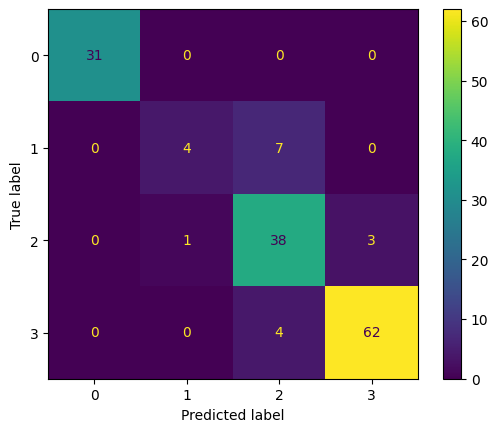

In [ ]:
ConfusionMatrixDisplay.from_predictions(data_1_3_y, y_train_pred)
plt.show()

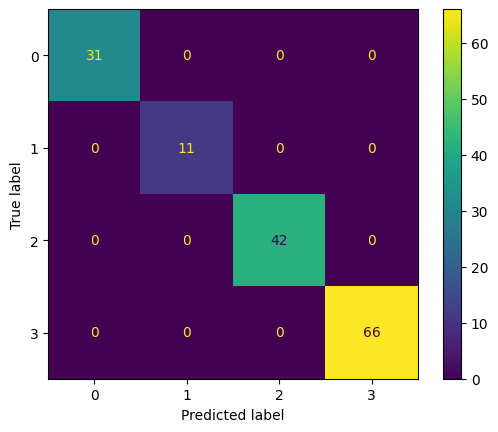

In [ ]:
ConfusionMatrixDisplay.from_predictions(data_1_3_y, data_1_3_y)
plt.show()

### Voting

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
            # ('lr', LogisticRegression(solver="liblinear", random_state=42)),
            # ('rf', RandomForestClassifier(random_state=42)),
            # ('knn',  KNeighborsClassifier(n_neighbors=3)),
            # ('dt', DecisionTreeClassifier(max_depth=7, random_state=42)),
            ('gd', GradientBoostingClassifier(random_state=42)),
            ('svc', SVC(gamma="auto", probability=True, random_state=42))
        ])
voting_clf.fit(data_1_3_train, data_1_3_y)
vt_rmses = cross_val_score(voting_clf, data_1_3_train, data_1_3_y, cv=5)
print(f"{pd.Series(vt_rmses).describe()['mean']:.4f} {vt_rmses}")

0.9000 [0.9        0.9        0.96666667 0.83333333 0.9       ]


### Stacking

In [ ]:
for n in range (2, 13):
    stacking_clf = StackingClassifier(
        estimators=[
#            ('lr', LogisticRegression(solver="liblinear", random_state=42)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('knn',  KNeighborsClassifier(n_neighbors=n)),
#            ('dt', DecisionTreeClassifier(max_depth=7, random_state=42)),
            ('gd', GradientBoostingClassifier(random_state=42)),
#            ('svc', SVC(gamma="auto", probability=True, random_state=42))
            ],
        final_estimator=RandomForestClassifier(random_state=43),
        cv=5 # number of cross-validation folds
    )
    stacking_clf.fit(data_1_3_train, data_1_3_y)
    st_rmses = cross_val_score(stacking_clf, data_1_3_train, data_1_3_y, cv=5)
    print(f"n {n}: {pd.Series(st_rmses).describe()['mean']:.4f} {st_rmses}")

n 2: 0.8867 [0.93333333 0.83333333 0.93333333 0.86666667 0.86666667]
n 3: 0.8933 [0.93333333 0.8        0.93333333 0.9        0.9       ]
n 4: 0.8733 [0.86666667 0.8        0.93333333 0.86666667 0.9       ]
n 5: 0.8733 [0.9        0.8        0.93333333 0.86666667 0.86666667]
n 6: 0.8733 [0.9        0.8        0.93333333 0.86666667 0.86666667]
n 7: 0.8933 [0.9        0.86666667 0.93333333 0.86666667 0.9       ]
n 8: 0.8800 [0.93333333 0.8        0.93333333 0.86666667 0.86666667]
n 9: 0.8733 [0.9        0.76666667 0.93333333 0.86666667 0.9       ]
n 10: 0.8933 [0.93333333 0.83333333 0.93333333 0.86666667 0.9       ]
n 11: 0.8867 [0.93333333 0.8        0.93333333 0.86666667 0.9       ]
n 12: 0.8867 [0.93333333 0.8        0.93333333 0.86666667 0.9       ]


In [ ]:
n = 3
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(solver="liblinear", random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('knn',  KNeighborsClassifier(n_neighbors=n)),
        ('dt', DecisionTreeClassifier(max_depth=7, random_state=42)),
        ('gd', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(gamma="auto", probability=True, random_state=42))
        ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5 # number of cross-validation folds
)
stacking_clf.fit(data_1_3_cr_train, data_1_3_y)
st_rmses = cross_val_score(stacking_clf, data_1_3_cr_train, data_1_3_y, cv=5)
print(f"n {n}: {pd.Series(st_rmses).describe()['mean']:.4f} {st_rmses}")

n 3: 0.8867 [0.86666667 0.83333333 0.96666667 0.86666667 0.9       ]


In [ ]:
n = 3
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(solver="liblinear", random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('knn',  KNeighborsClassifier(n_neighbors=n)),
        # ('dt', DecisionTreeClassifier(max_depth=7, random_state=42)),
        ('gd', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(gamma="auto", probability=True, random_state=42))
        ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5 # number of cross-validation folds
)
stacking_clf.fit(data_1_3_cr_train, data_1_3_y)
st_rmses = cross_val_score(stacking_clf, data_1_3_cr_train, data_1_3_y, cv=5)
print(f"n {n}: {pd.Series(st_rmses).describe()['mean']:.4f} {st_rmses}")

n 3: 0.8933 [0.93333333 0.83333333 0.93333333 0.86666667 0.9       ]
